# Linear Regression Analysis

### This notebook is intended to assess which features may have most predictive power within an Ordinary Least Squares Model

**Import necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns
import re

**Read in processed data**

In [2]:
data = [pd.read_csv('asos_snotel_UA_12hr_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_UA_df = pd.concat(data)
pd.set_option('display.expand_frame_repr', True)


### Linear Regression Analysis

**Linear Regression plots were created and regression statistics were calculated using SciPy's linegress function:**


**Abbreviation descriptions: **  
* **CMtn = Copper Mountain AWOS site**
* **CMtnSNTL = Copper Mountain Snotel Site**  
* **LXV = Nearby Leadville, CO ASOS site**  
* **KGJT = Grand Junction, CO upper air data**  
* **tmpc = temperature (deg C)**  
* **dwpc = dewpoint (deg C) **  
* **speed = wind speed**  
* **drct = wind direction**  
* **height = height at which pressure level occurs**  

### Scatter Plots

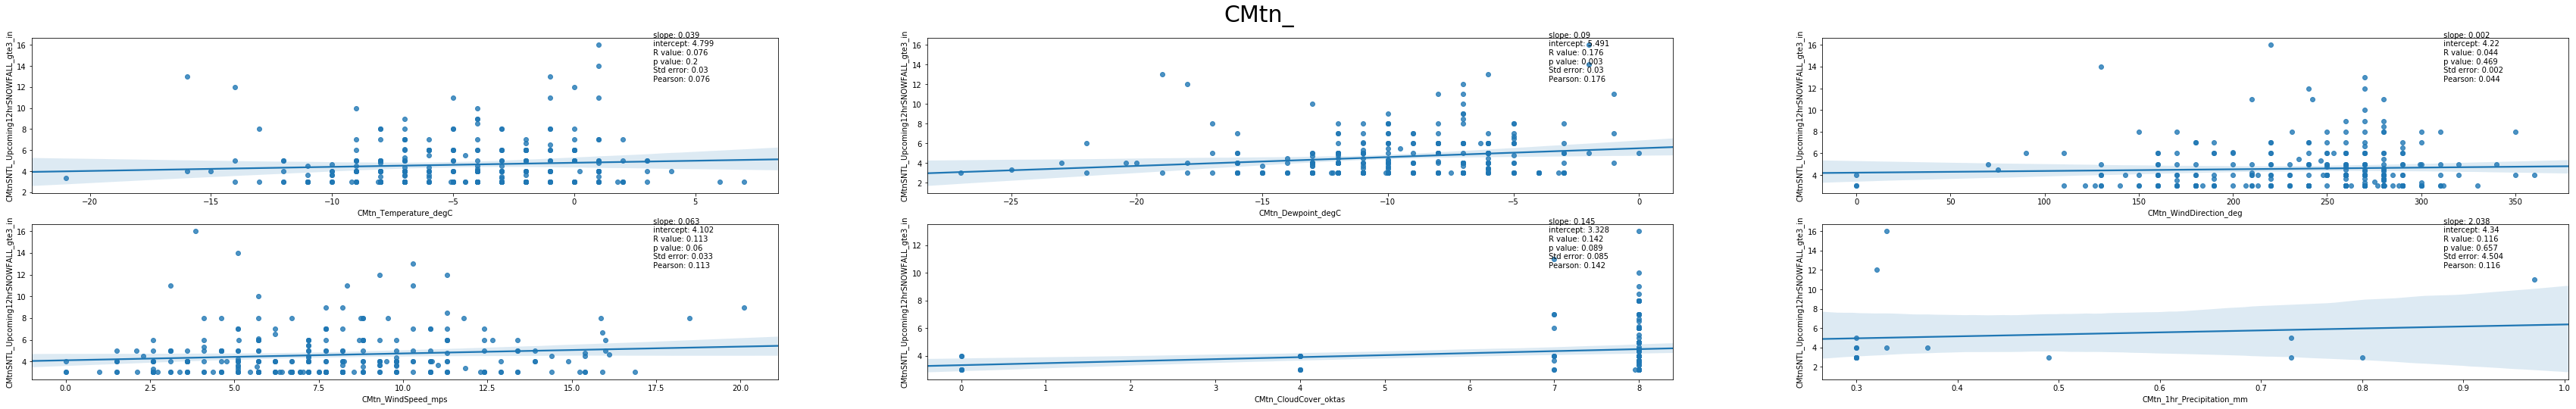

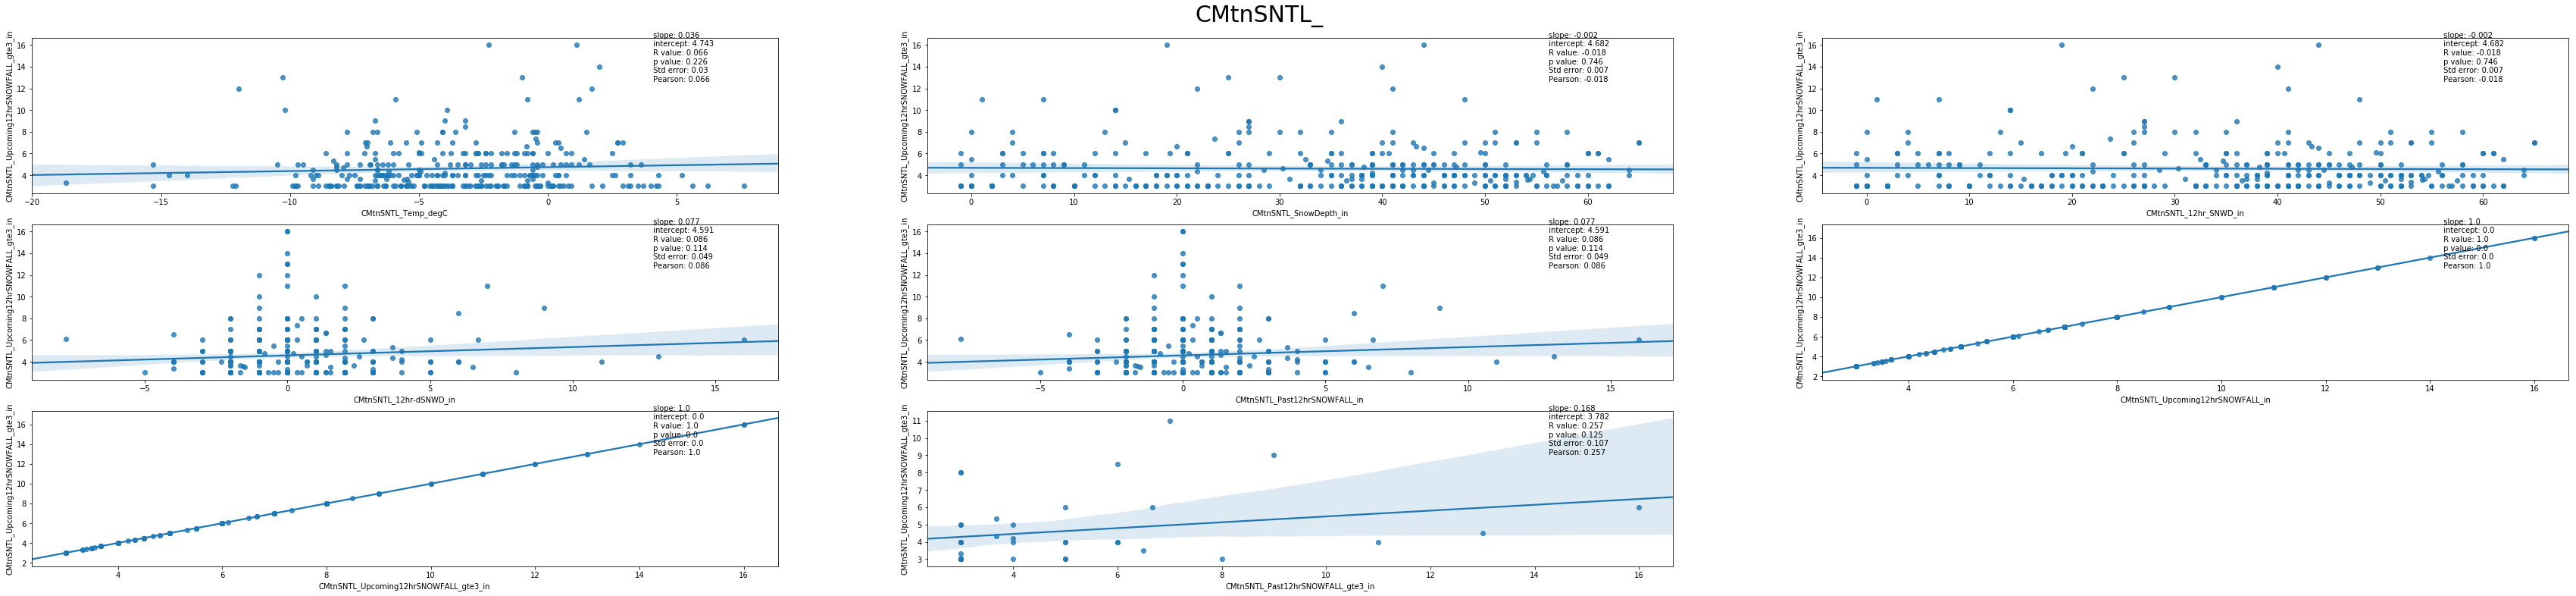

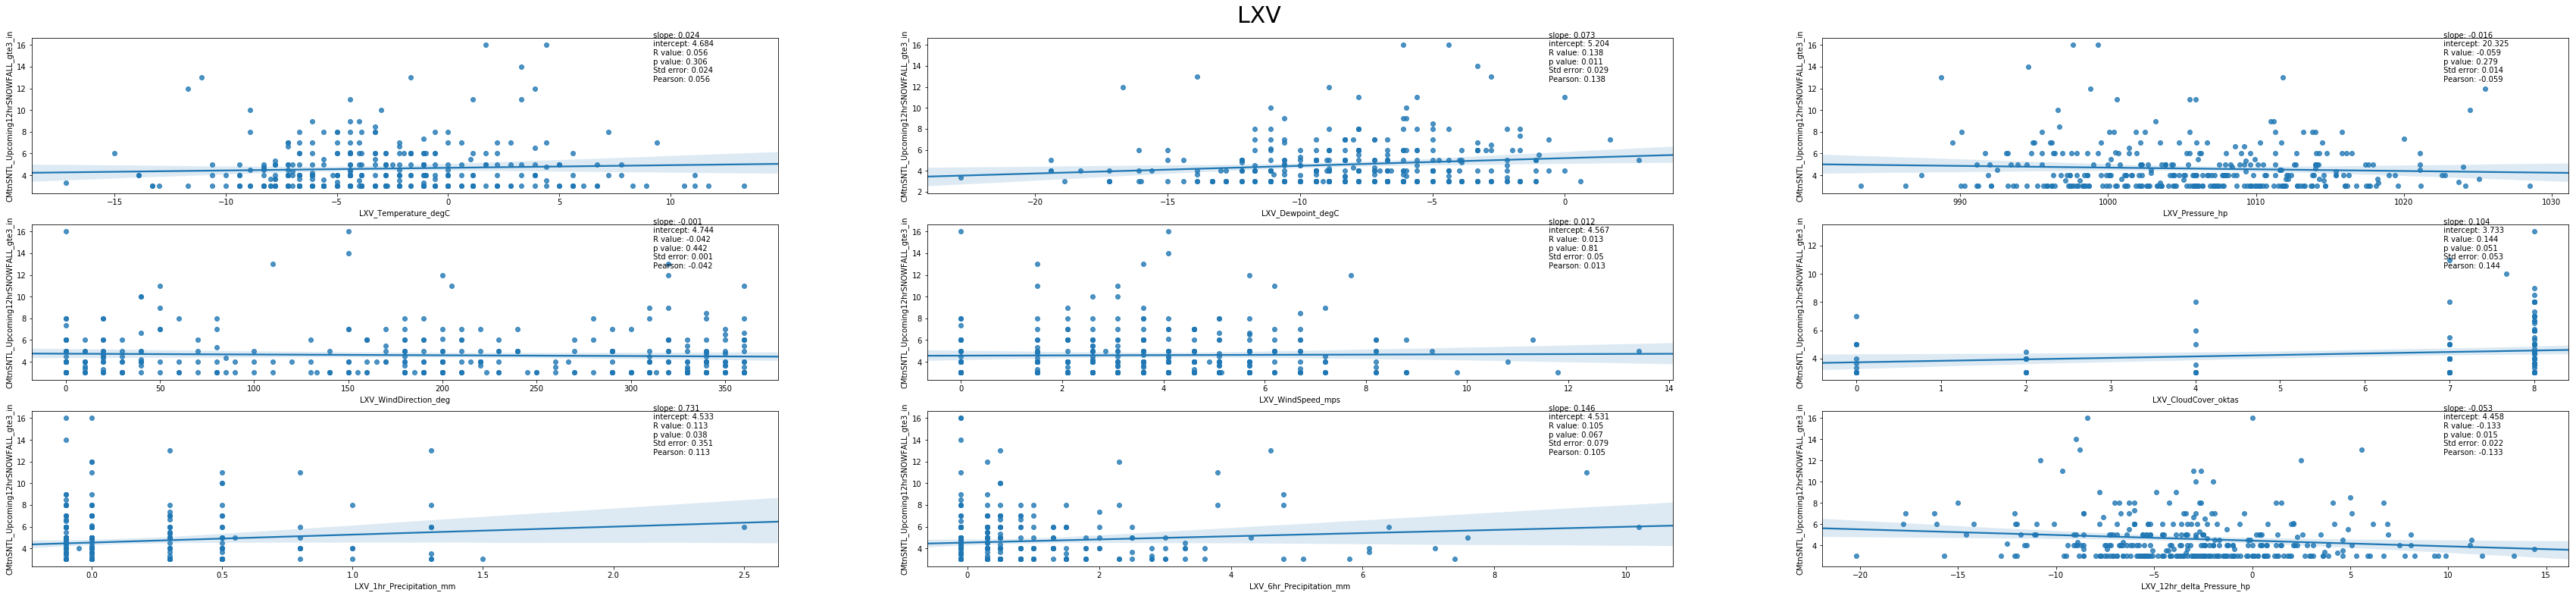

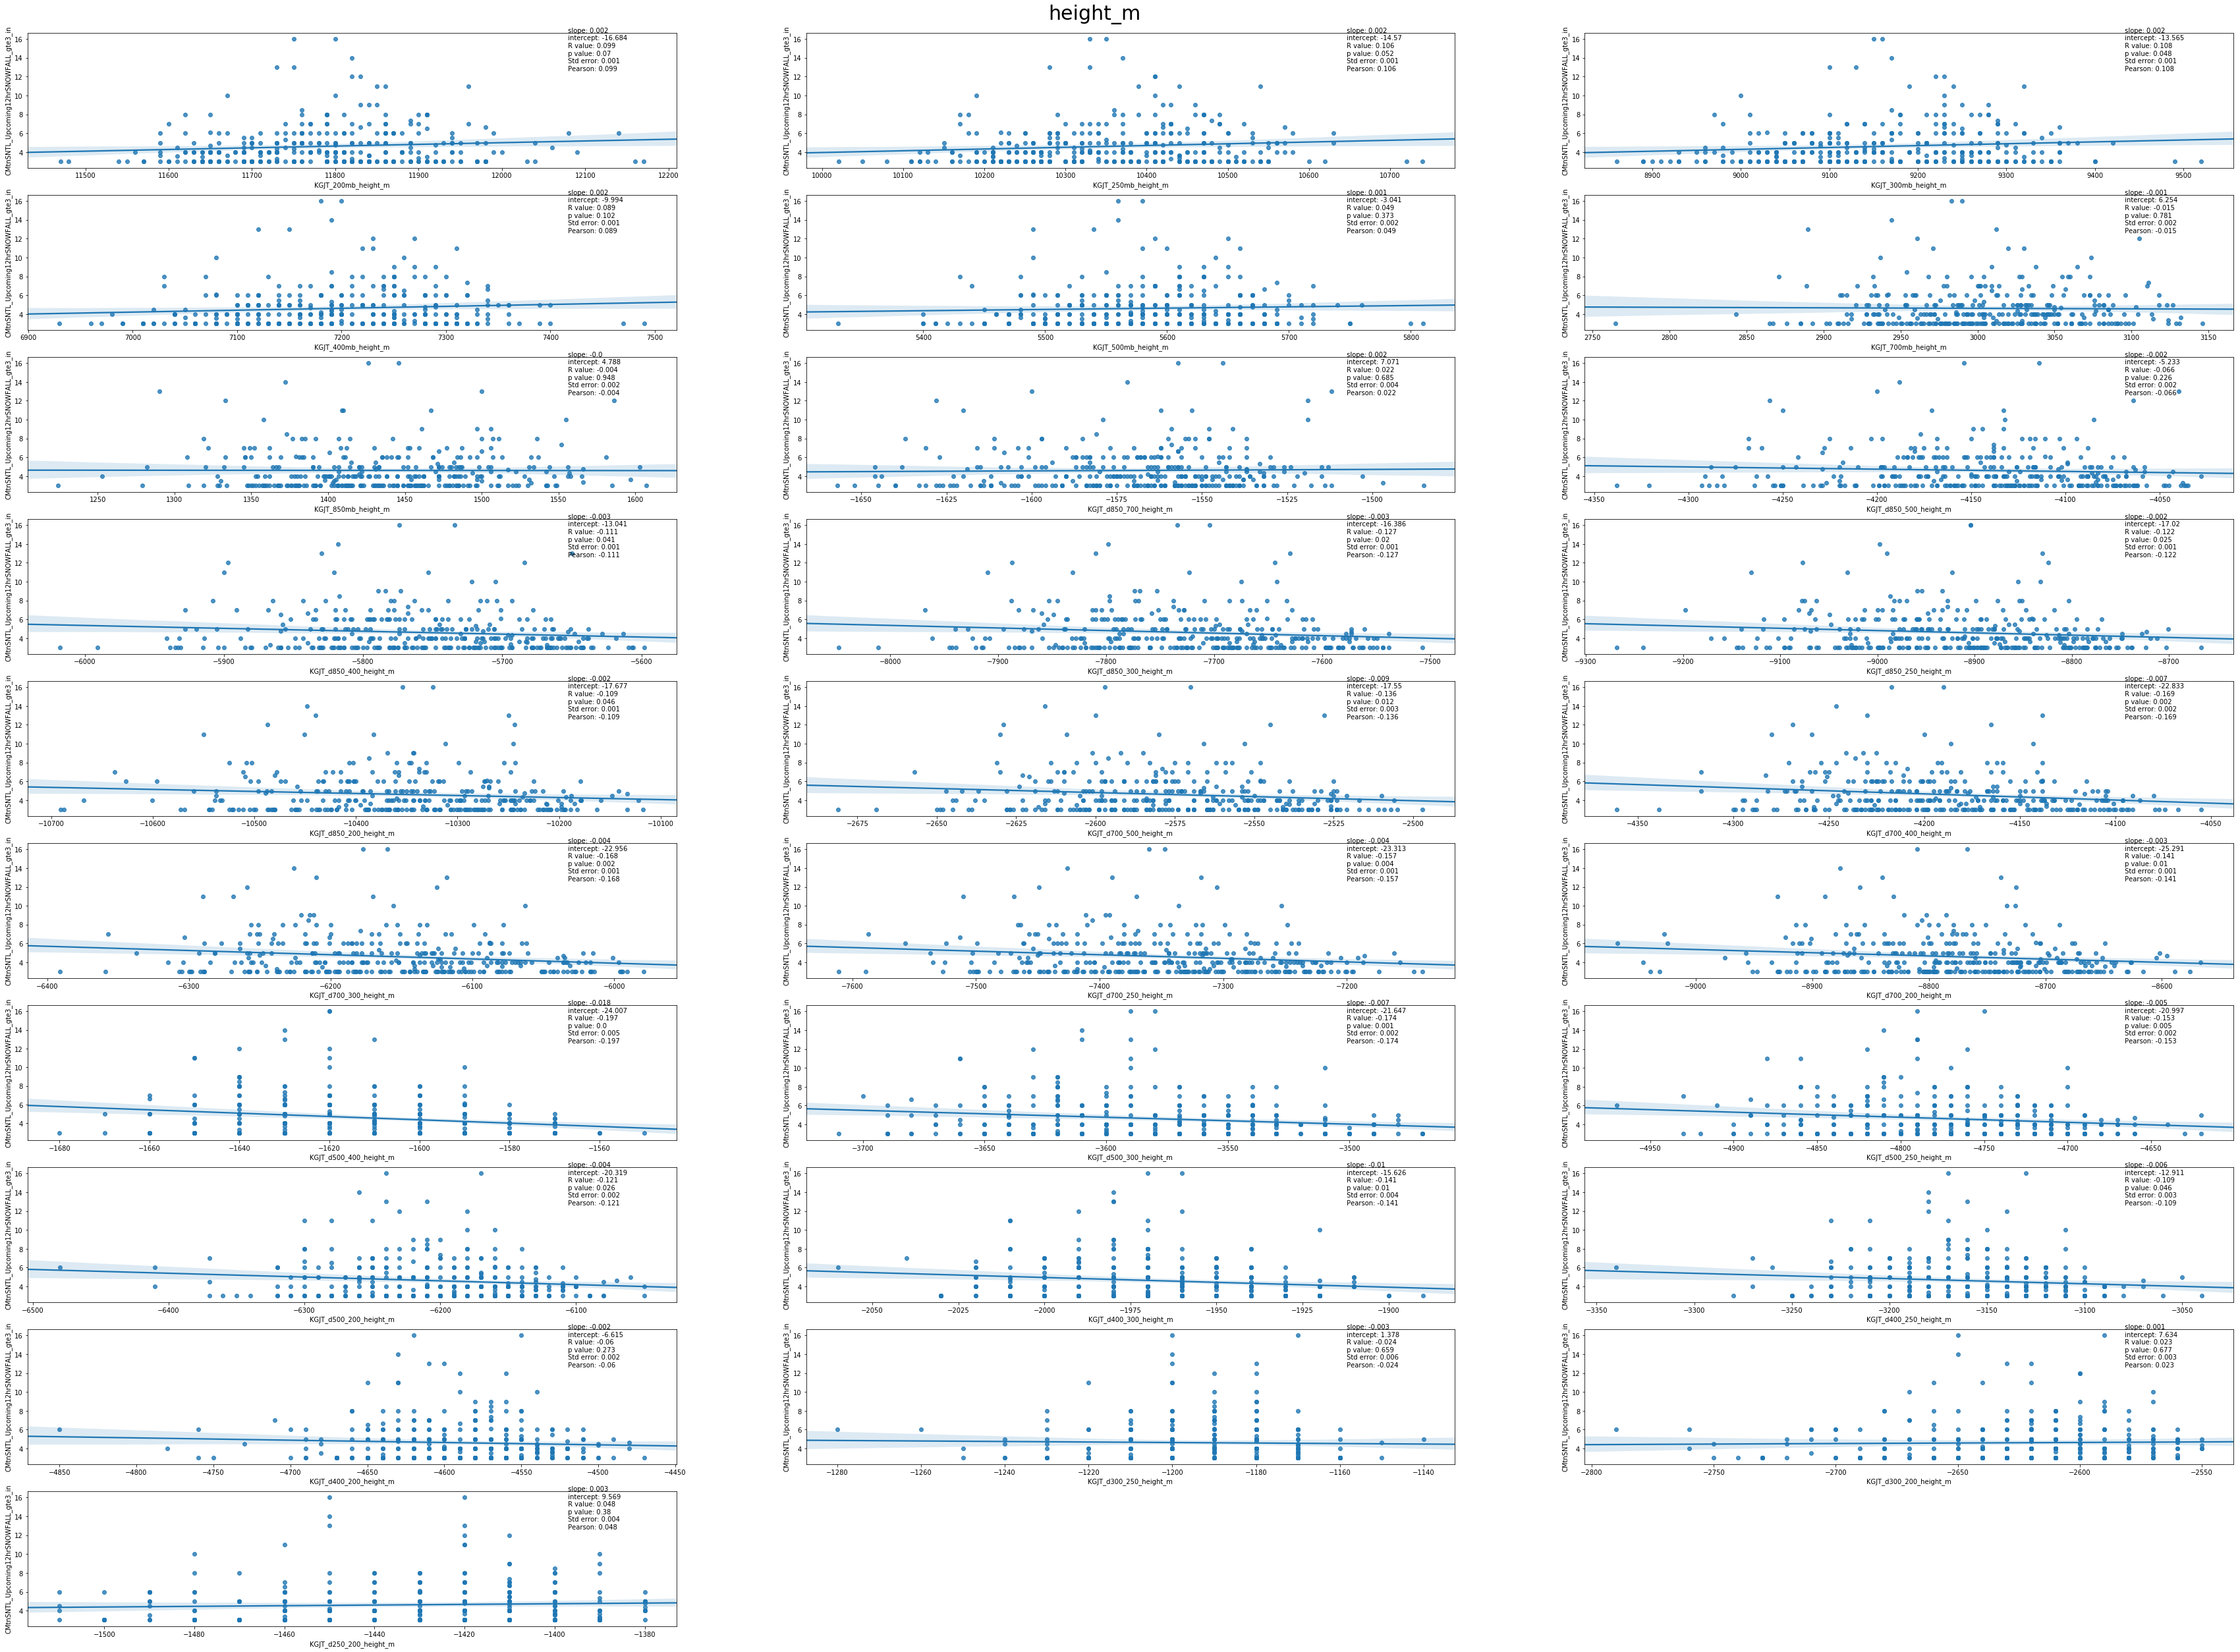

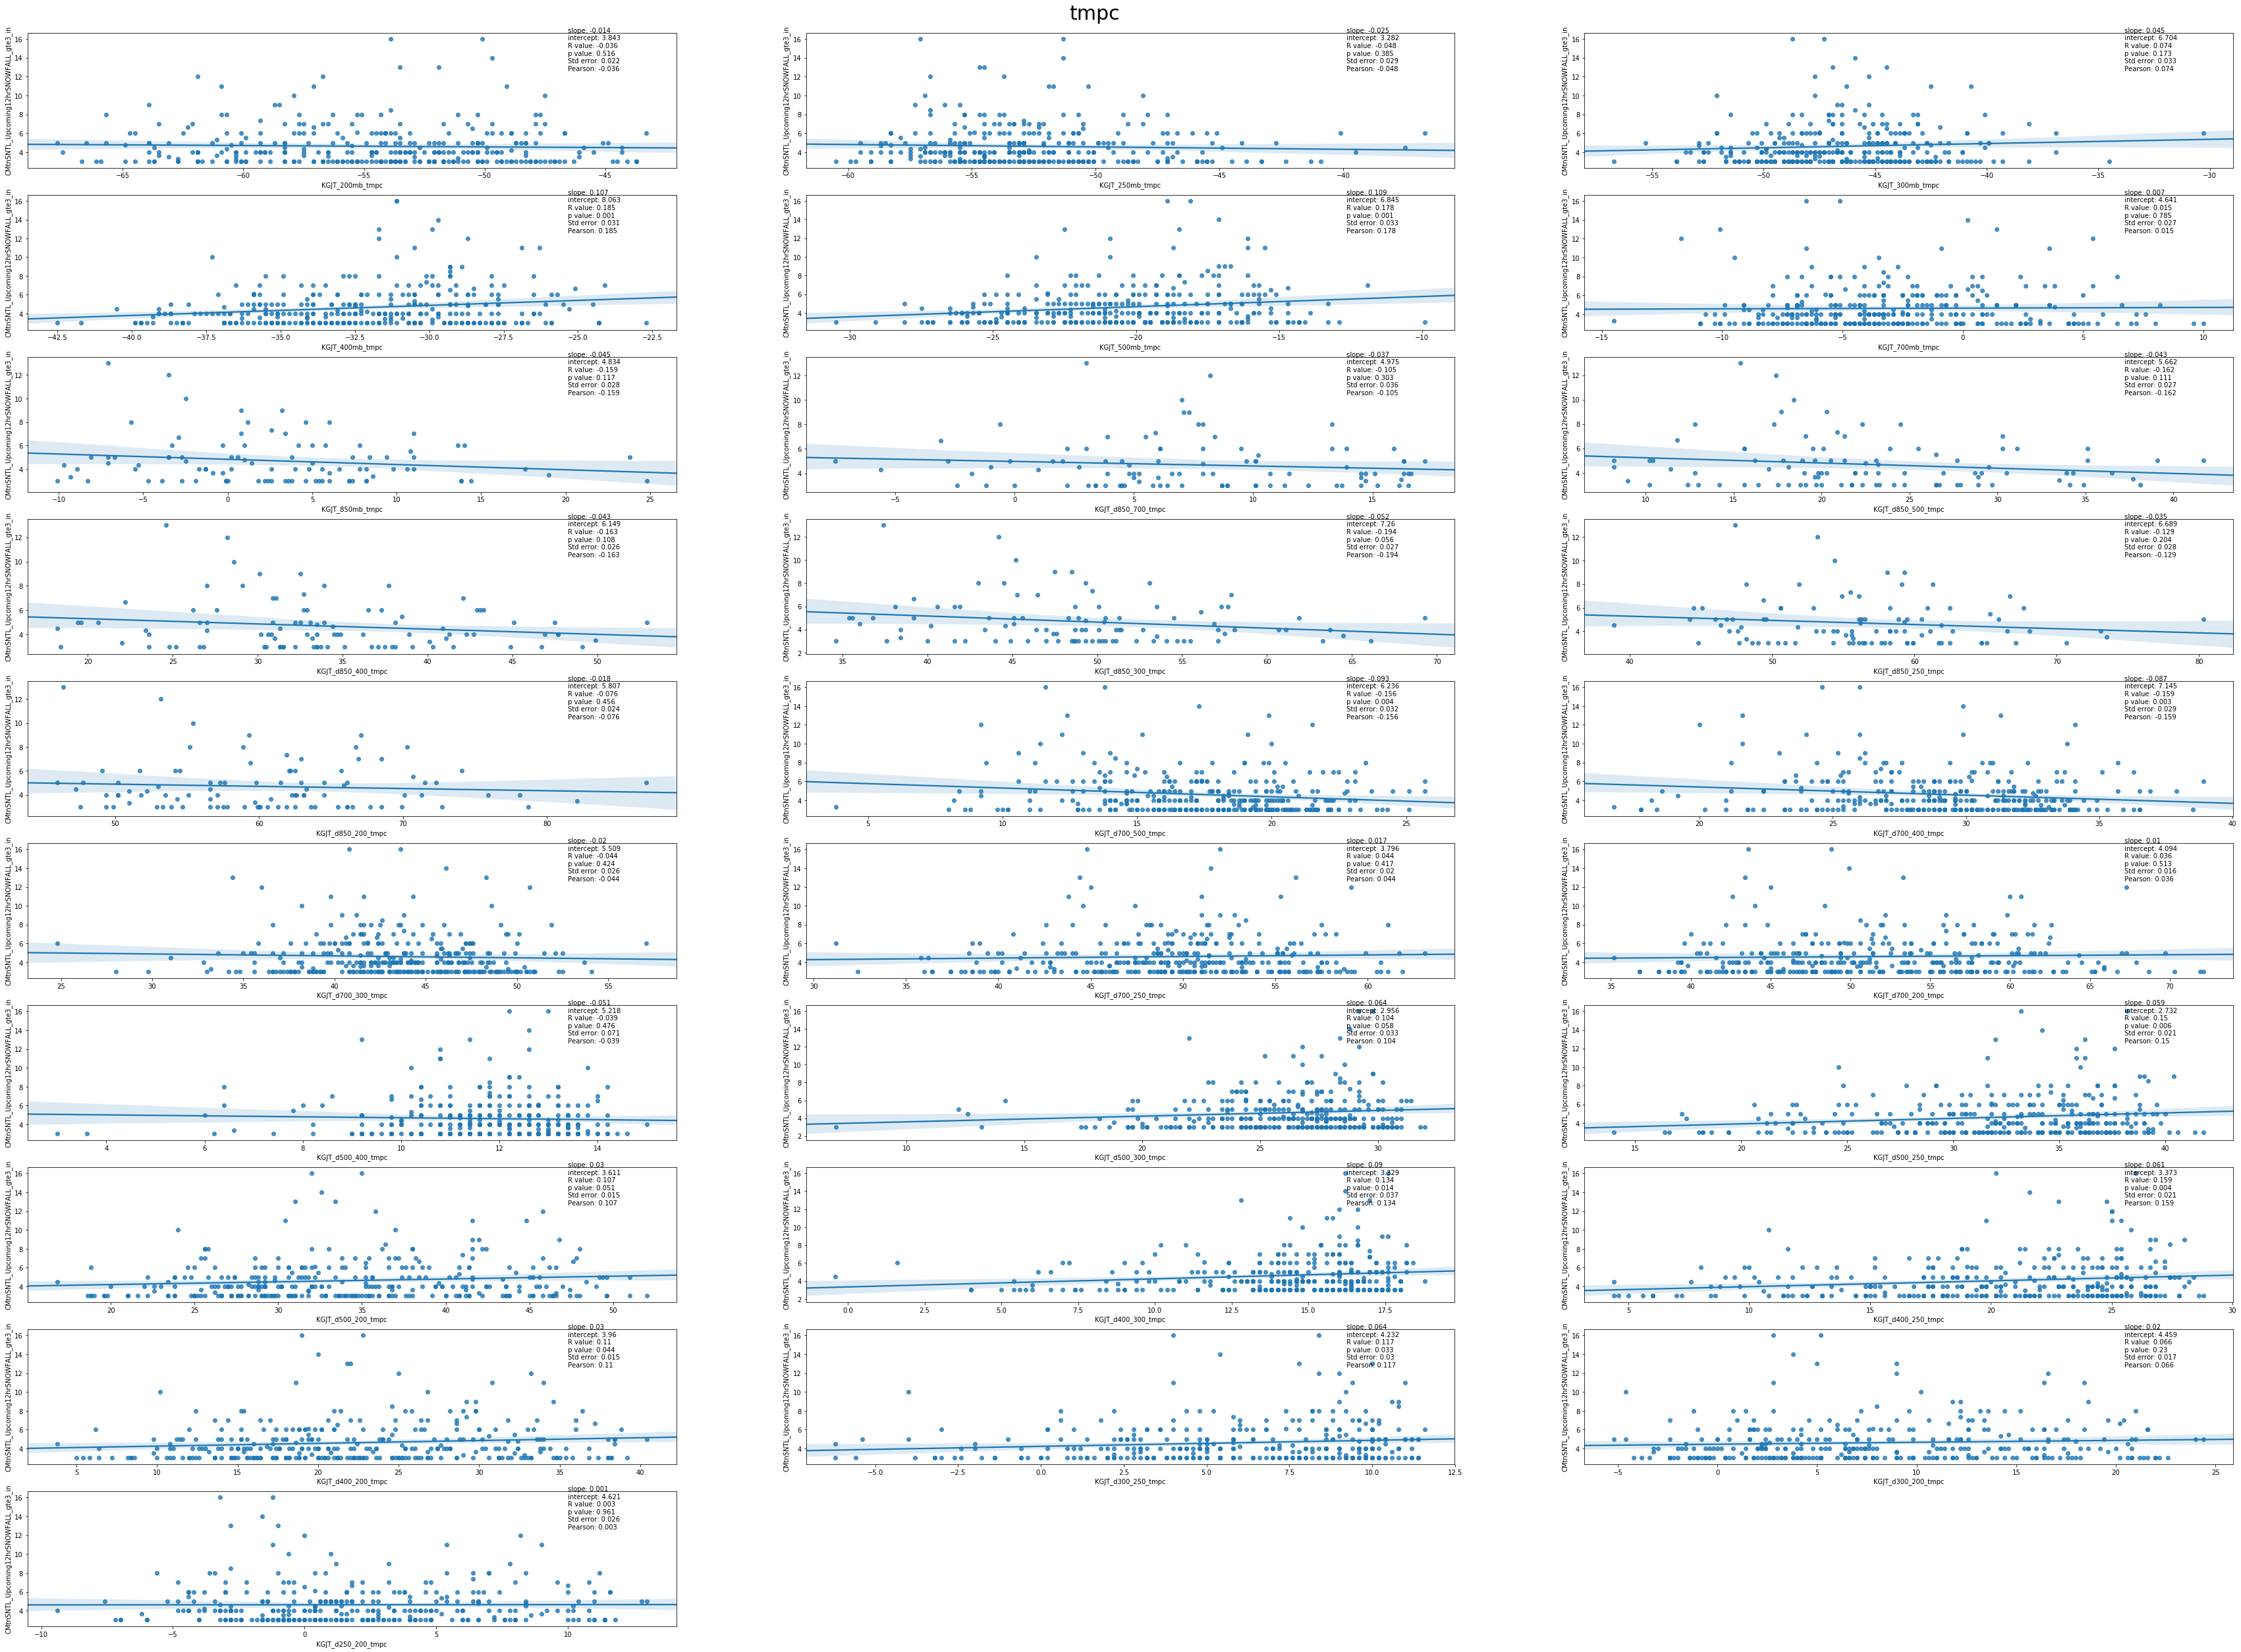

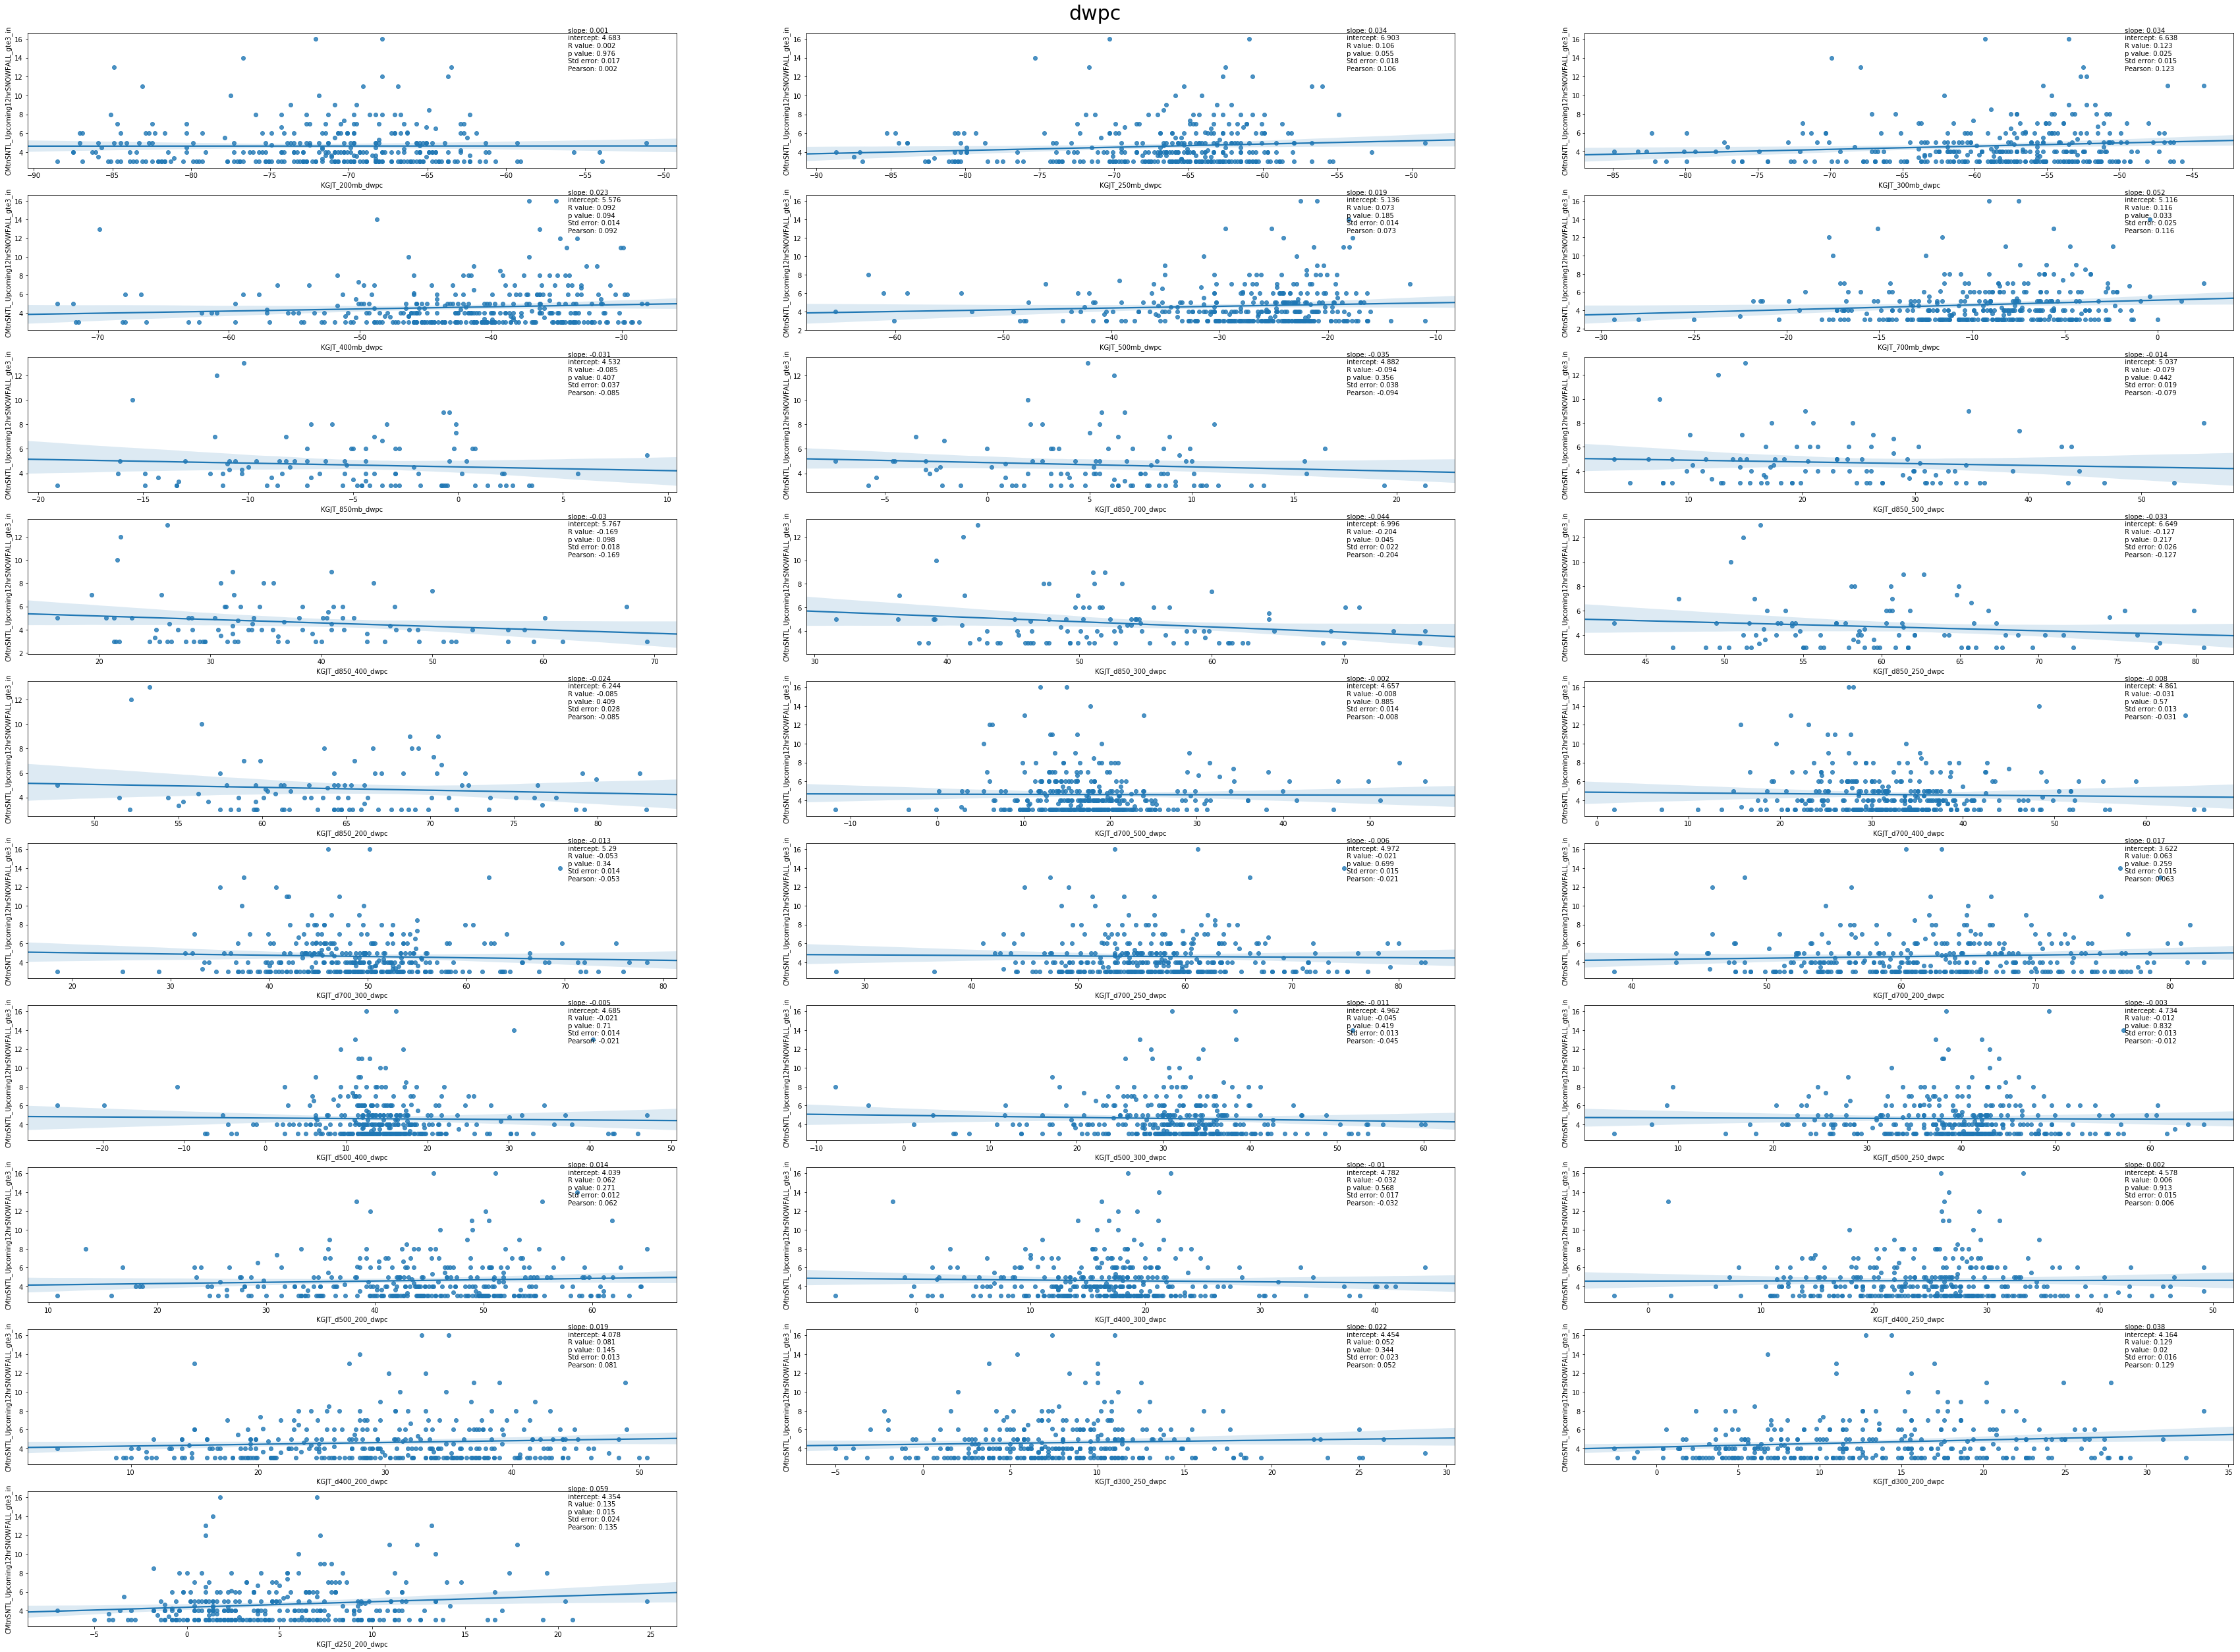

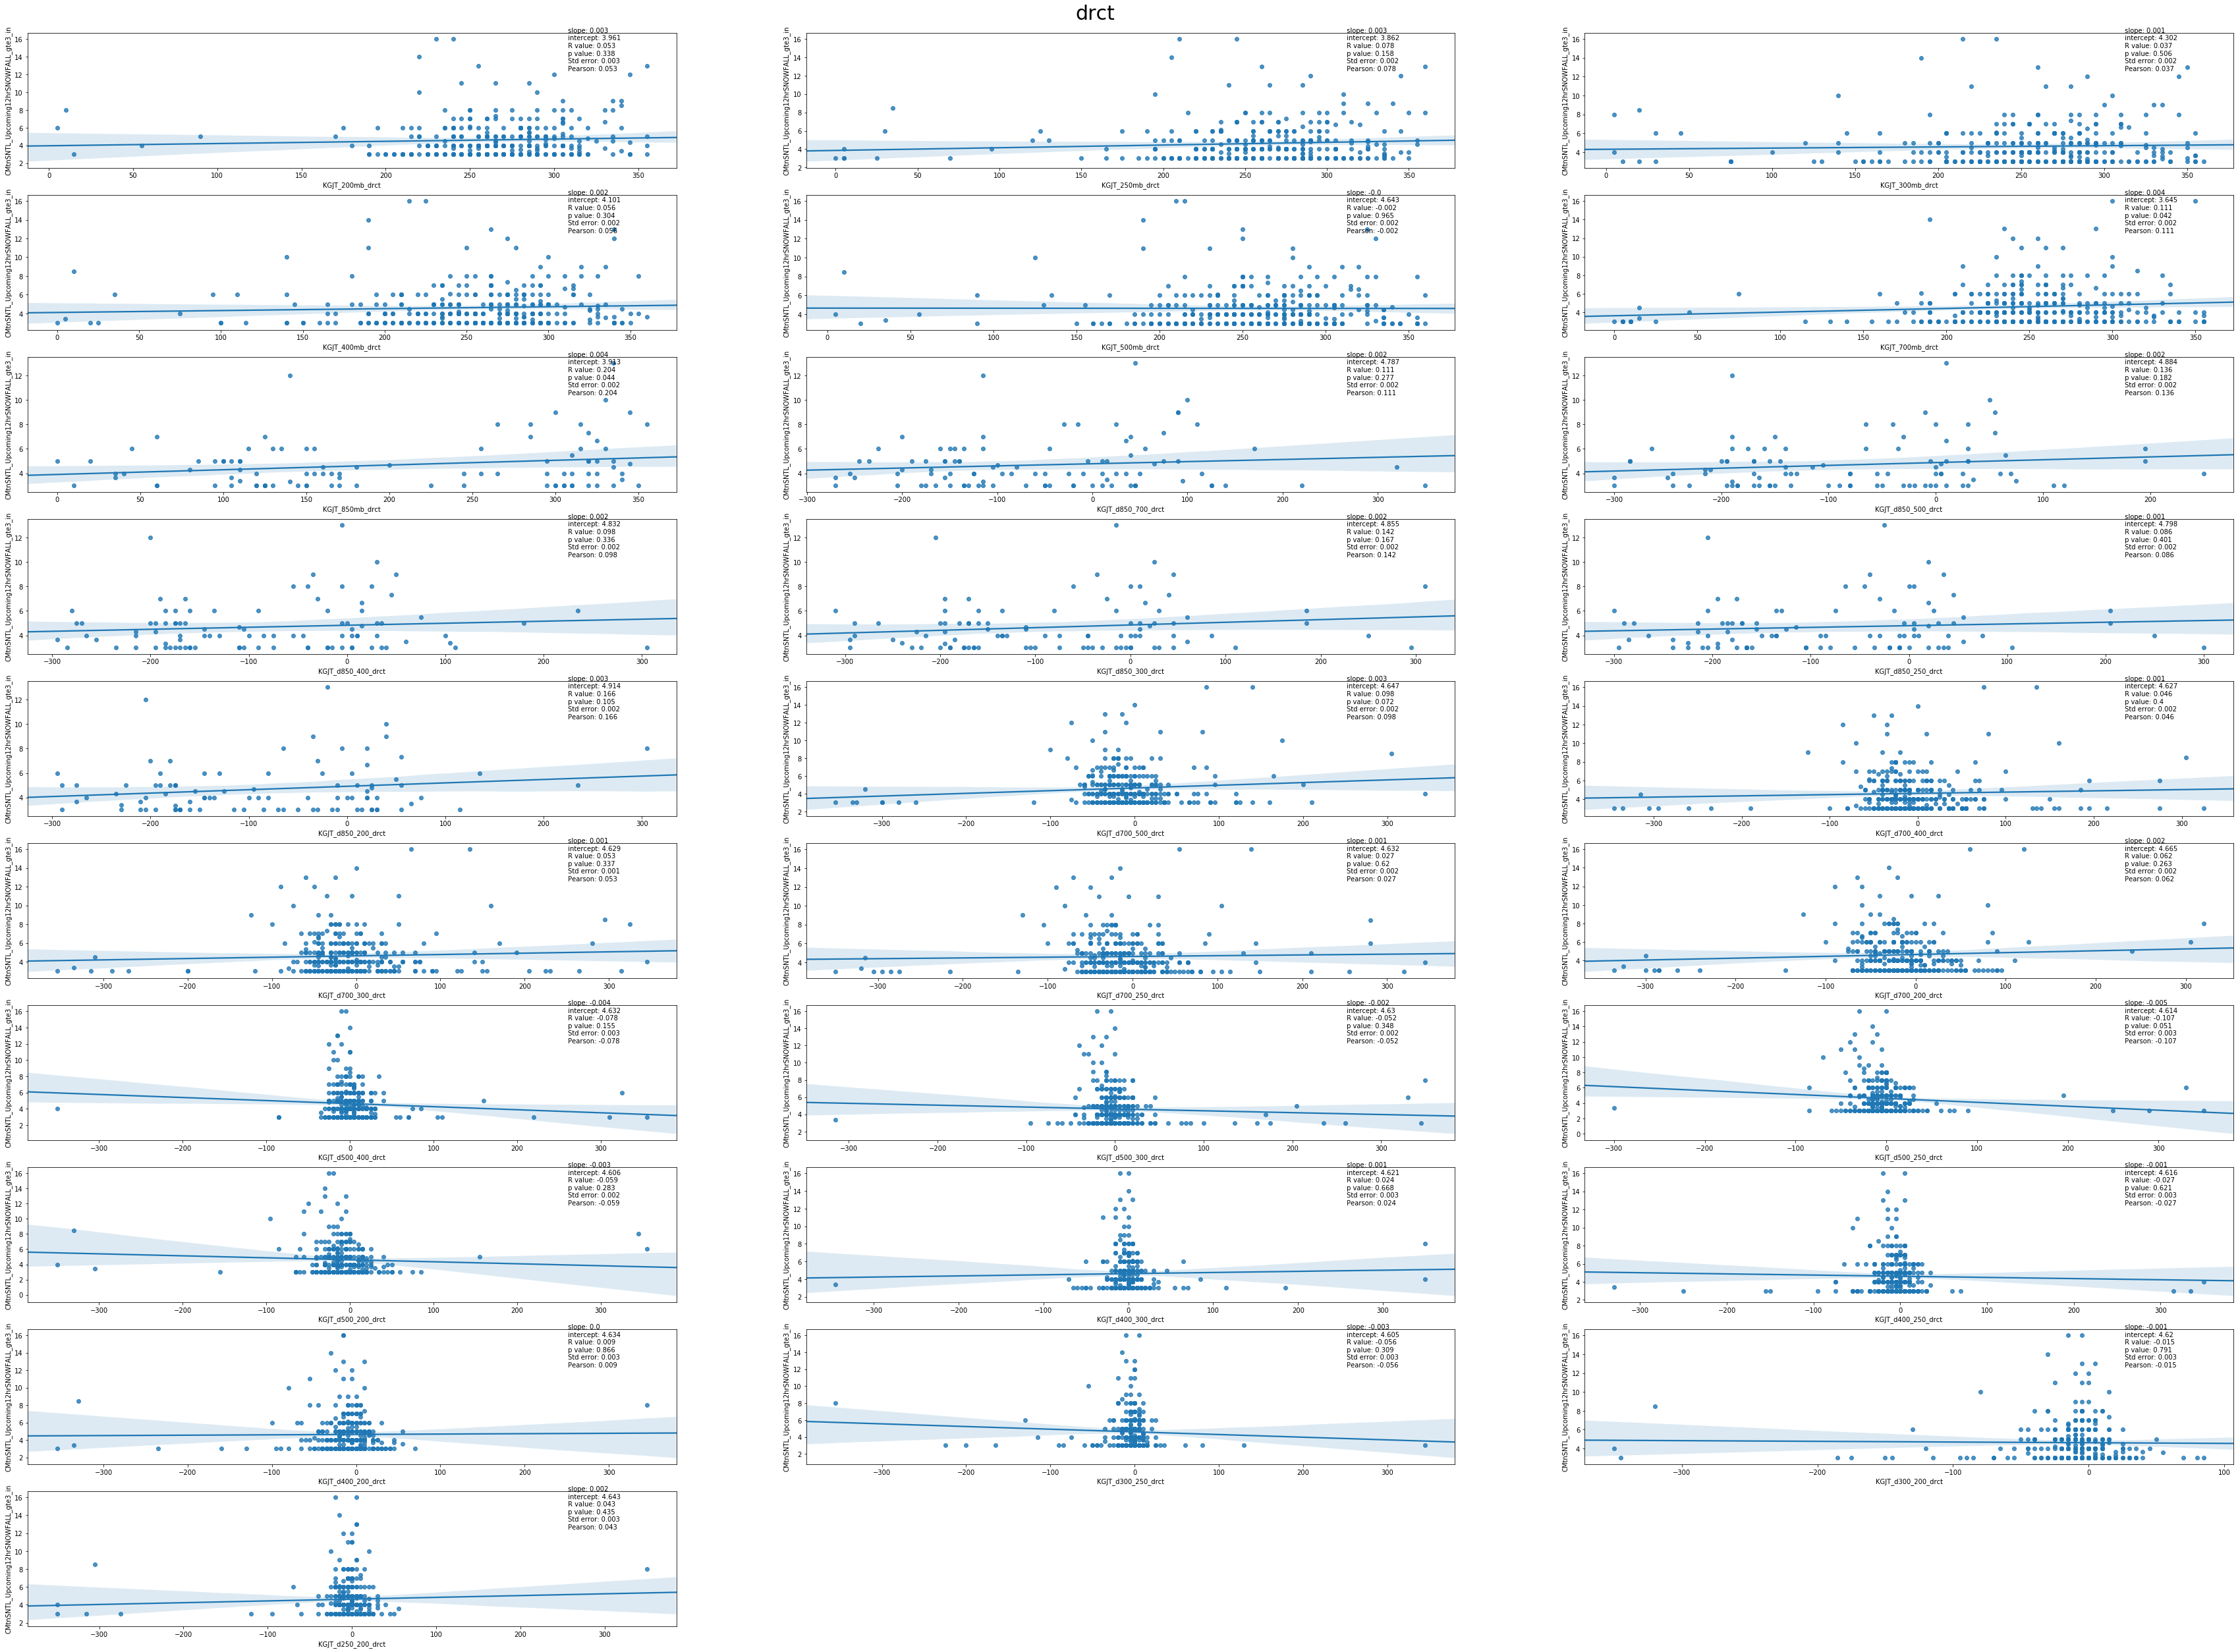

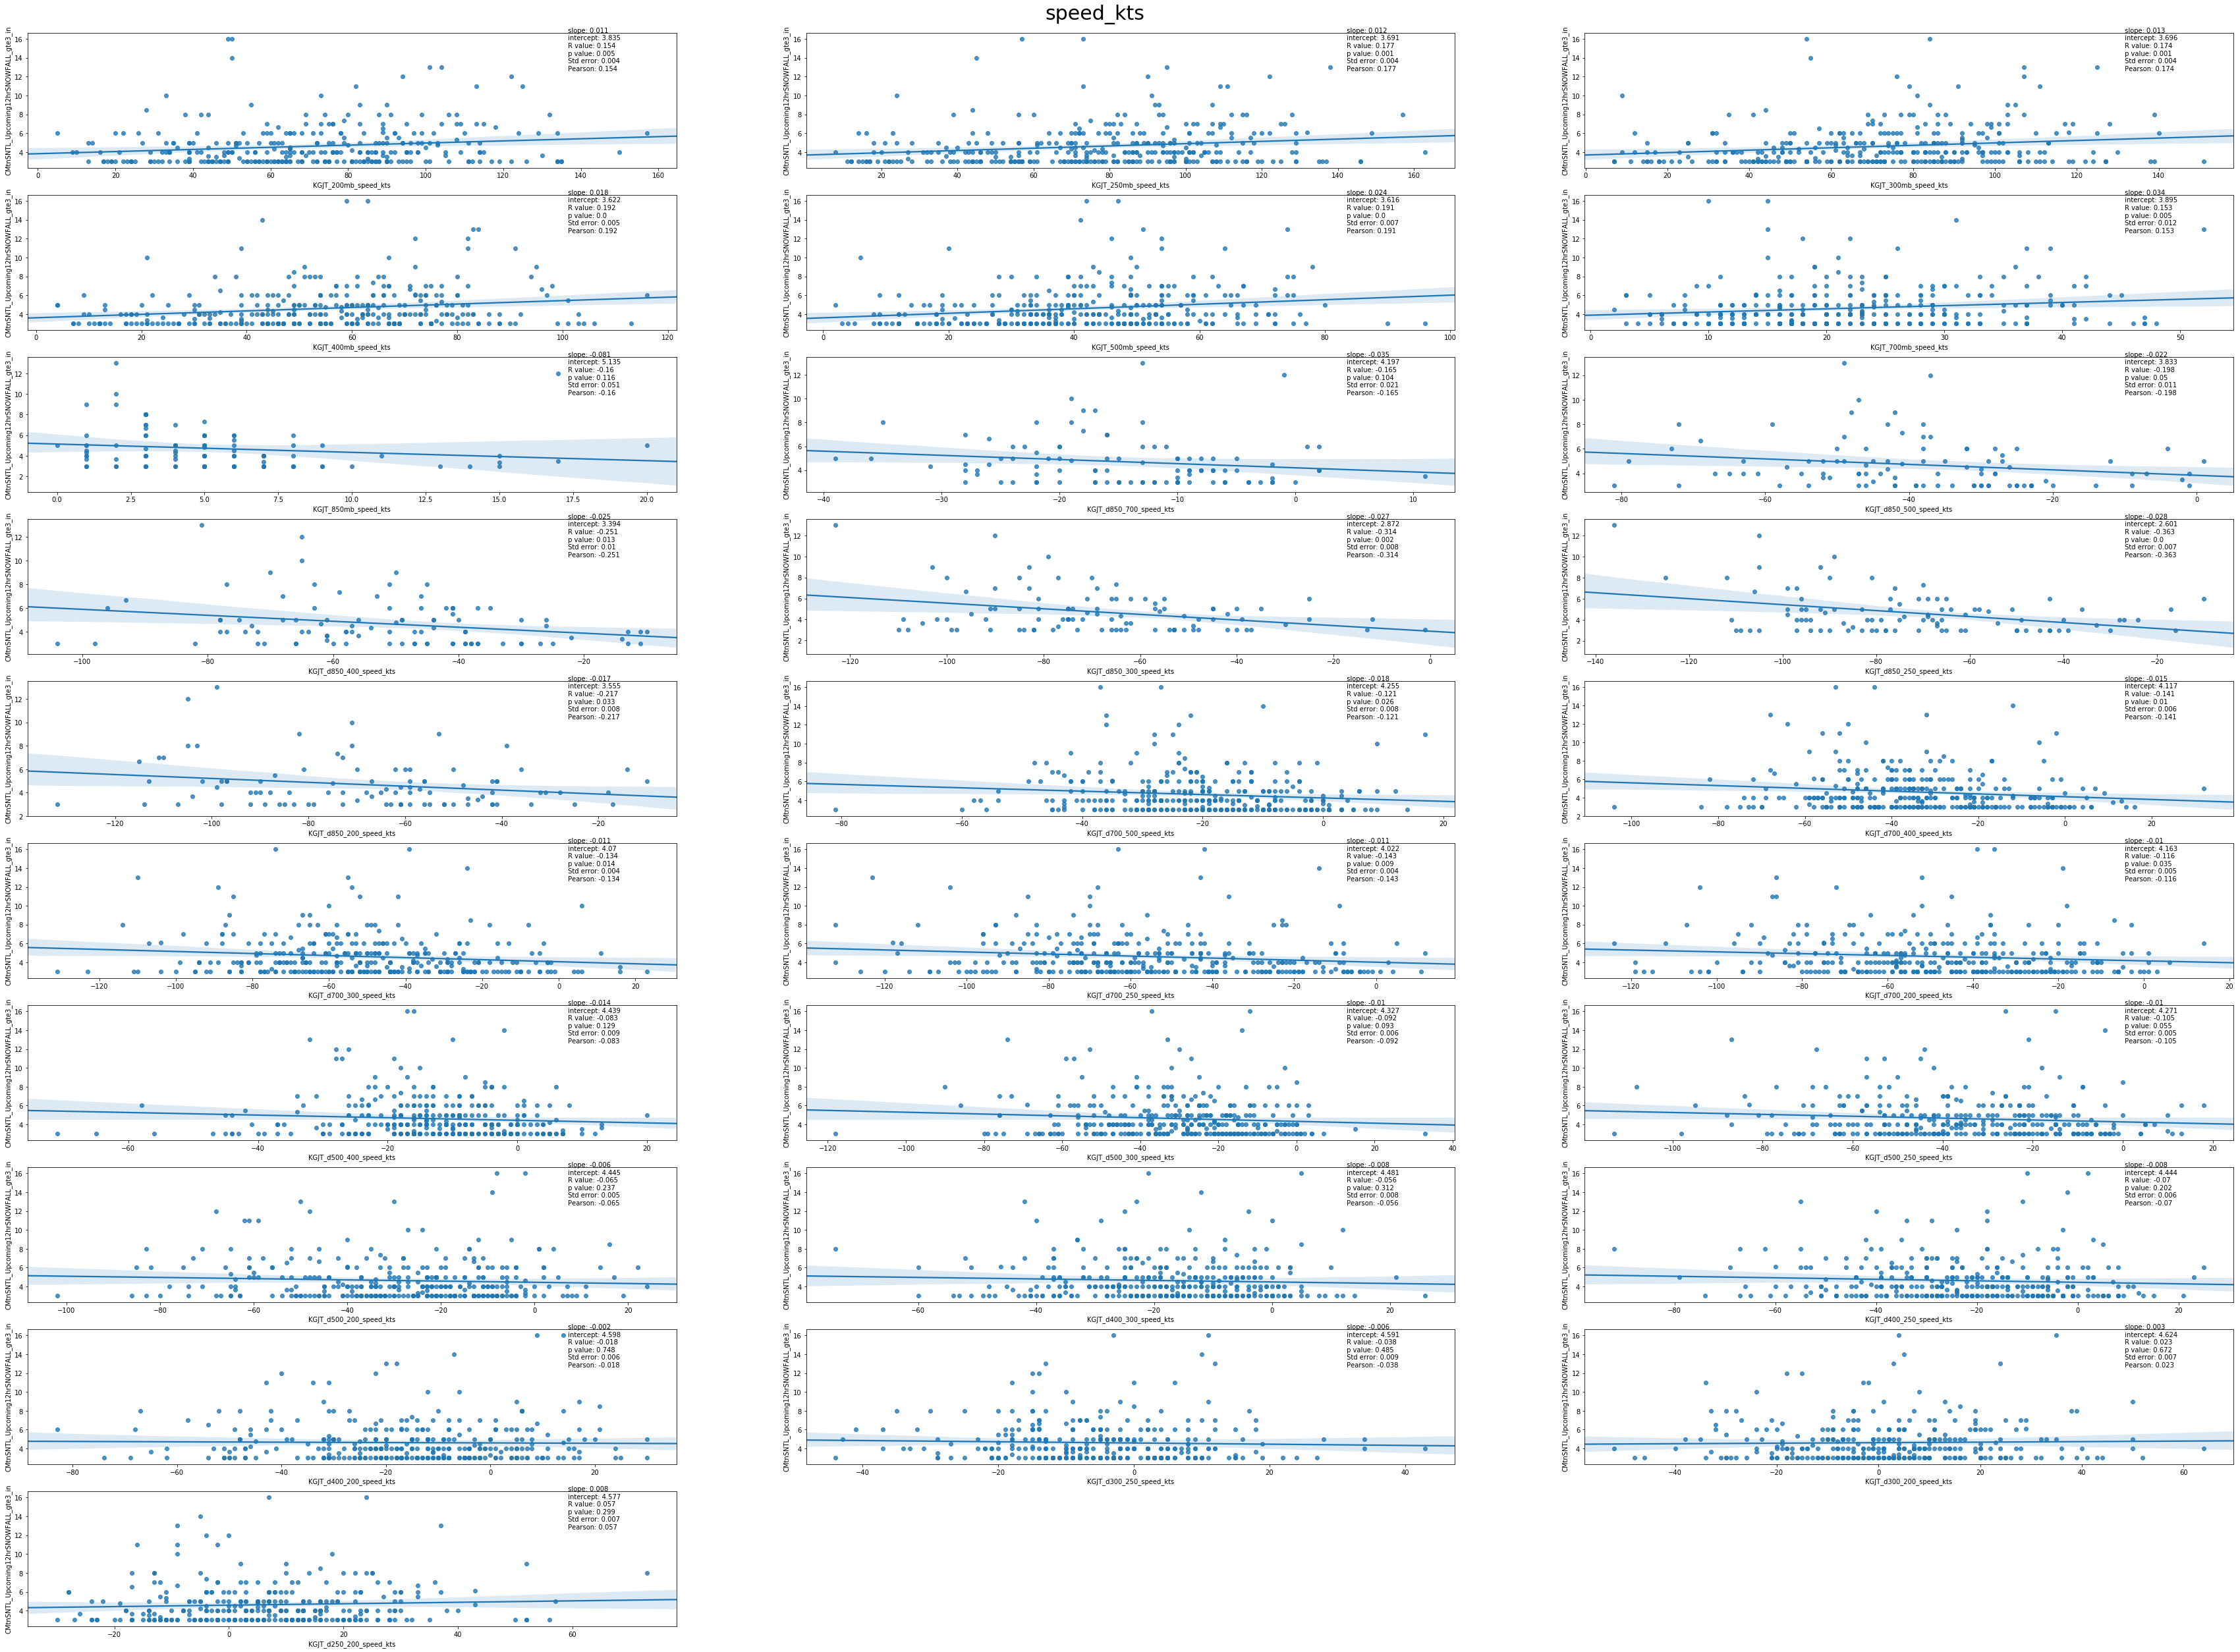

In [3]:
import re
from scipy.stats import pearsonr, linregress

ax = None
r_values = []
r2_values = []
p_values =[]
v = []
missing = []
slopes=[]
std_errs = []
maxes = []
mins = []
means = []
feature_types = []
#%matplotlib notebook


snf_df = asos_snotel_UA_df['CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in']



## Ifentify levels to group plots.  Each feature name as a prefix
levels = ['CMtn_','CMtnSNTL_', 'LXV', 'height_m', 'tmpc', 'dwpc', 'drct', 'speed_kts'] # 'height_m', 'tmpc', 'dwpc', 'drct', 'speed_kts']


for level in levels:
    
    if (level == 'CMtn_') or (level == 'CMtnSNTL_') or (level == 'LXV'):
        feature_type = 'Surface'
    else:
        feature_type = 'Upper Air'
    

    
    fig = plt.figure(figsize=(60,40))
    fig.suptitle(level, fontsize = 30)
    
        #keys = re.findall(levels[level], asos_snotel_UA_df.keys().tolist())

    keys = list(filter(re.compile(level).search, (asos_snotel_UA_df.keys().tolist())))
   

    
    #keys = asos_snotel_UA_df.filter(regex=level).columns
    for k in range(len(keys)):    
        
    
        xx_df = None
        plt.subplot(10,3,k+1)
        plt.subplots_adjust(top=0.965)

        xx_df = asos_snotel_UA_df[keys[k]]  #.resample('12H').mean()
        idx = np.isfinite(xx_df) & np.isfinite(snf_df)
        
        
        sns.regplot(xx_df[idx], snf_df[idx])
    
        pearson, pv = pearsonr(xx_df[idx], snf_df[idx])
        slope, intercept, r_value, p_value, std_err = linregress(xx_df[idx], snf_df[idx])


        plt.annotate(' slope: ' + str(round(slope,3)) +
                 '\n intercept: ' + str(round(intercept,3)) + 
                 '\n R value: ' + str(round(r_value,3)) +  
                 '\n p value: ' + str(round(p_value,3)) + 
                 '\n Std error: ' + str(round(std_err,3)) +
                 '\n Pearson: ' + str(round(pearson,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=10)
        
        
        #Create lists of values for table
        maxes.append(xx_df[idx].max())
        mins.append(xx_df[idx].min())
        means.append(xx_df[idx].mean())
        slopes.append(slope)
        std_errs.append(std_err)
        p_values.append(p_value)
        r_values.append(r_value)
        r2_values.append(r_value*r_value)
        v.append(keys[k])
        feature_types.append(feature_type)
        missing.append(round(1 - xx_df[idx].count()/snf_df.count(),2)*100)
                                      
    #fig.savefig(keys[k]+'.png')
    #plt.show()
    
    #fig.clf()
    #plt.close()





# plt.show()


**We can see that the linear regression fits are not stellar, but there is some potential as the p values for many features is small. It is more informative to look at some tables of statistics.**

In [4]:
#tbl = list(zip(v, feature_type, maxes, mins, means, slopes, std_errs, r2_values, p_values, missing))
#tbl_df = pd.DataFrame(tbl)

In [5]:

tbl = list(zip(v, feature_types, maxes, mins, means, slopes, std_errs, r2_values, p_values, missing))
tbl_df = pd.DataFrame(tbl, columns = ["Feature", "Feature Type", "Max", "Min", "Mean", "Slope", "Std Error", "R2 Value", "P-value", "% Missing"]).set_index('Feature')
tbl_df.drop(['CMtnSNTL_SnowDepth_in','CMtnSNTL_12hr-dSNWD_in','CMtnSNTL_Upcoming12hrSNOWFALL_in', 'CMtnSNTL_Upcoming12hrSNOWFALL_gte3_in', 'CMtnSNTL_Past12hrSNOWFALL_in', \
             'CMtnSNTL_12hr_SNWD_in', 'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm'], inplace=True)    # not interested in these features for linear regression table
tbl_df = tbl_df[tbl_df['% Missing']<34]  #we are only going to use features which have high data capture
#print(tbl_df)
sfc_tbl_df= tbl_df[tbl_df['Feature Type']=="Surface"].sort_values(['R2 Value'], ascending=[False])
ua_tbl_df= tbl_df[tbl_df['Feature Type']=="Upper Air"].sort_values(['R2 Value'], ascending=[False])


In [6]:

pd.DataFrame(sfc_tbl_df[:20], columns=["Feature Type", "R2 Value", "P-value", "% Missing"])


Feature Type  R2 Value   P-value  % Missing
Feature                                                               
CMtn_Dewpoint_degC              Surface  0.030856  0.002730       14.0
LXV_Dewpoint_degC               Surface  0.018933  0.011330        0.0
LXV_12hr_delta_Pressure_hp      Surface  0.017791  0.014563        1.0
CMtn_WindSpeed_mps              Surface  0.012827  0.060239       18.0
CMtn_Temperature_degC           Surface  0.005726  0.199614       14.0
CMtnSNTL_Temp_degC              Surface  0.004355  0.226230        0.0
LXV_Pressure_hp                 Surface  0.003510  0.278864        1.0
LXV_Temperature_degC            Surface  0.003114  0.306330        0.0
CMtn_WindDirection_deg          Surface  0.001912  0.469430       18.0
LXV_WindDirection_deg           Surface  0.001763  0.441707        0.0
LXV_WindSpeed_mps               Surface  0.000173  0.809847        0.0

In [7]:
pd.DataFrame(ua_tbl_df[:20], columns=["Feature Type", "R2 Value", "P-value", "% Missing"])

Feature Type  R2 Value   P-value  % Missing
Feature                                                            
KGJT_d500_400_height_m     Upper Air  0.039005  0.000270        1.0
KGJT_400mb_speed_kts       Upper Air  0.036676  0.000415        1.0
KGJT_500mb_speed_kts       Upper Air  0.036386  0.000438        1.0
KGJT_400mb_tmpc            Upper Air  0.034410  0.000632        1.0
KGJT_500mb_tmpc            Upper Air  0.031794  0.001028        1.0
KGJT_250mb_speed_kts       Upper Air  0.031295  0.001209        2.0
KGJT_d500_300_height_m     Upper Air  0.030242  0.001373        1.0
KGJT_300mb_speed_kts       Upper Air  0.030108  0.001480        1.0
KGJT_d700_400_height_m     Upper Air  0.028542  0.001886        1.0
KGJT_d700_300_height_m     Upper Air  0.028128  0.002038        1.0
KGJT_d700_400_tmpc         Upper Air  0.025262  0.003488        1.0
KGJT_d400_250_tmpc         Upper Air  0.025142  0.003567        1.0
KGJT_d700_250_height_m     Upper Air  0.024687  0.003886        1.0
KGJT_d700_500_tmpc         Upper Air  0.024318  0.004165        1.0
KGJT_200mb_speed_kts       Upper Air  0.023711  0.005125        3.0
KGJT_700mb_speed_kts       Upper Air  0.023533  0.004829        1.0
KGJT_d500_250_height_m     Upper Air  0.023280  0.005066        1.0
KGJT_d500_250_tmpc         Upper Air  0.022367  0.006021        1.0
KGJT_d700_250_speed_kts    Upper Air  0.020536  0.008928        2.0
KGJT_d700_200_height_m     Upper Air  0.019851  0.009711        1.0

** **


**Based on R squared values, the best surface predictive features are Dewpoint, 12-hour pressure changes, and wind speed**
  
  
**For Upper Air, height differences between the 500mb and 400mb levels, as well as wind speeds at the 500mb and 400mb levels seem to be most predictive.**

**From these plots, we can see some relationship between snowfall amounts for some meteorological variables.  **



***